In [1]:
import sys
sys.path.append('/home/shiftpub/Dynamic_AMM/inf_step_exp/mc_approach')
from crazy_simulation import AMMSimulator

path = '/home/shiftpub/Dynamic_AMM/inf_step_exp/mc_approach/crazy_simulation_results/20250410_011107'
# AMMSimulator.combine_chunks(path, delete_chunks=False)

In [2]:
import pandas as pd

path = '/home/shiftpub/Dynamic_AMM/inf_step_exp/mc_approach/crazy_simulation_results/20250410_011107/simulation_results_combined.parquet'
diff_df = pd.read_parquet(path)
print(diff_df.columns)

Index(['seed_idx', 'sigma', 'gamma', 'price', 'x_dis', 'y_dis', 'x_rinc',
       'y_rinc', 'x_rout', 'y_rout', 'dis_inc_fees', 'dis_out_fees'],
      dtype='object')


In [3]:

diff_df['vout_dis'] = diff_df['x_dis'] * diff_df['price'] + diff_df['y_dis'] + diff_df['dis_out_fees']
diff_df['vinc_dis'] = diff_df['x_dis'] * diff_df['price'] + diff_df['y_dis'] + diff_df['dis_inc_fees']
diff_df['vout_re'] = diff_df['x_rout'] * diff_df['price'] + diff_df['y_rout'] 
diff_df['vinc_re'] = diff_df['x_rinc'] * diff_df['price'] + diff_df['y_rinc'] 
diff_df['diff_dis_out_in'] = diff_df['vout_dis'] - diff_df['vinc_dis']
diff_df['diff_re_out_in'] = diff_df['vout_re'] - diff_df['vinc_re']
diff_df['diff_dis_out_re_out'] = diff_df['vout_dis'] - diff_df['vout_re']
diff_df['diff_dis_in_re_in'] = diff_df['vinc_dis'] - diff_df['vinc_re']

: 

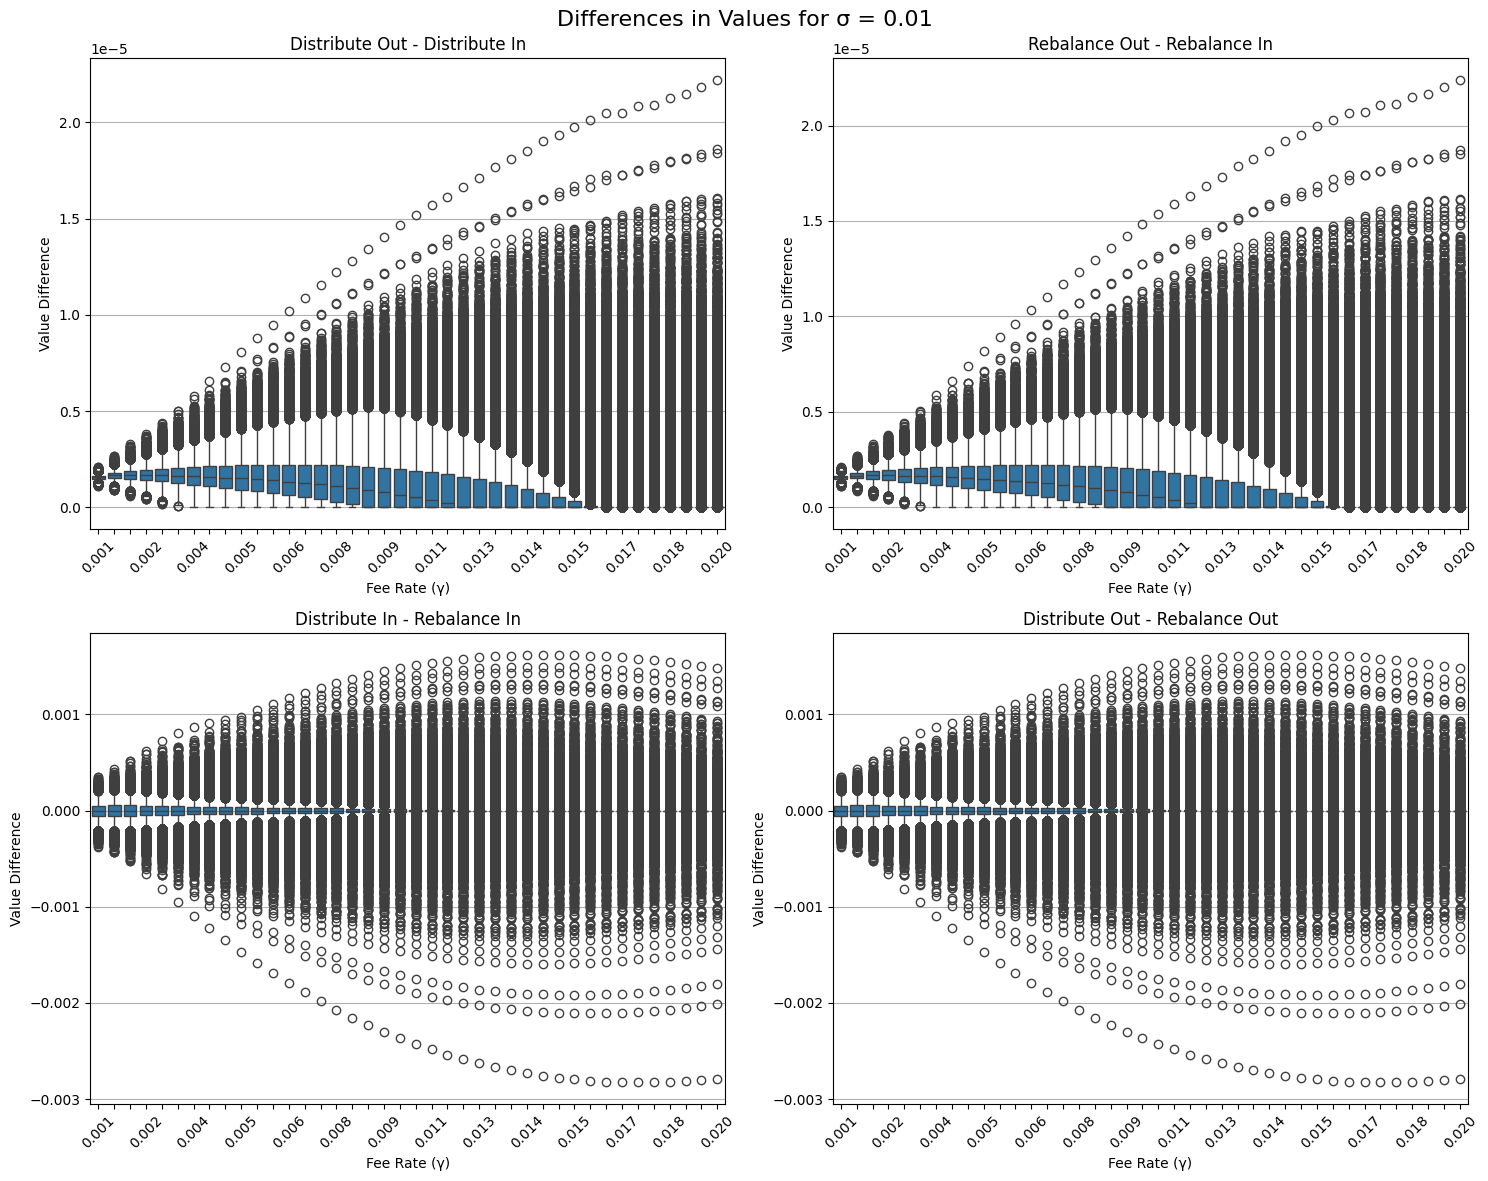

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def create_boxplots_for_sigma(sigma_value, path, output_dir="plots"):
    """Create boxplots for a specific sigma value.
    
    Parameters:
    -----------
    sigma_value : float
        The sigma value to filter data for
    path : str
        Path to the parquet file
    output_dir : str
        Directory to save the output plot
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Read and filter data for the specific sigma value
    df = pd.read_parquet(path)
    df = df[df['sigma'] == sigma_value]
    
    # Calculate the derived values
    df['vout_dis'] = df['x_dis'] * df['price'] + df['y_dis'] + df['dis_out_fees']
    df['vinc_dis'] = df['x_dis'] * df['price'] + df['y_dis'] + df['dis_inc_fees']
    df['vout_re'] = df['x_rout'] * df['price'] + df['y_rout'] 
    df['vinc_re'] = df['x_rinc'] * df['price'] + df['y_rinc'] 
    
    # Calculate differences
    df['diff_dis_out_in'] = df['vout_dis'] - df['vinc_dis']
    df['diff_re_out_in'] = df['vout_re'] - df['vinc_re']
    df['diff_dis_out_re_out'] = df['vout_dis'] - df['vout_re']
    df['diff_dis_in_re_in'] = df['vinc_dis'] - df['vinc_re']
    
    # Get unique gamma values for tick labels
    unique_gammas = sorted(df['gamma'].unique())
    tick_positions = np.arange(len(unique_gammas))
    tick_labels = [f'{gamma:.3f}' if i % 3 == 0 else '' for i, gamma in enumerate(unique_gammas)]
    
    # Create the plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Differences in Values for σ = {sigma_value}', fontsize=16)
    
    # Plot 1: Distribute Out - Distribute In
    ax1 = axes[0, 0]
    sns.boxplot(data=df, x='gamma', y='diff_dis_out_in', ax=ax1)
    ax1.set_title('Distribute Out - Distribute In')
    ax1.set_xlabel('Fee Rate (γ)')
    ax1.set_ylabel('Value Difference')
    ax1.grid(True, axis='y')
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels(tick_labels, rotation=45)
    
    # Plot 2: Rebalance Out - Rebalance In
    ax2 = axes[0, 1]
    sns.boxplot(data=df, x='gamma', y='diff_re_out_in', ax=ax2)
    ax2.set_title('Rebalance Out - Rebalance In')
    ax2.set_xlabel('Fee Rate (γ)')
    ax2.set_ylabel('Value Difference')
    ax2.grid(True, axis='y')
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels(tick_labels, rotation=45)
    
    # Plot 3: Distribute In - Rebalance In
    ax3 = axes[1, 0]
    sns.boxplot(data=df, x='gamma', y='diff_dis_in_re_in', ax=ax3)
    ax3.set_title('Distribute In - Rebalance In')
    ax3.set_xlabel('Fee Rate (γ)')
    ax3.set_ylabel('Value Difference')
    ax3.grid(True, axis='y')
    ax3.set_xticks(tick_positions)
    ax3.set_xticklabels(tick_labels, rotation=45)
    
    # Plot 4: Distribute Out - Rebalance Out
    ax4 = axes[1, 1]
    sns.boxplot(data=df, x='gamma', y='diff_dis_out_re_out', ax=ax4)
    ax4.set_title('Distribute Out - Rebalance Out')
    ax4.set_xlabel('Fee Rate (γ)')
    ax4.set_ylabel('Value Difference')
    ax4.grid(True, axis='y')
    ax4.set_xticks(tick_positions)
    ax4.set_xticklabels(tick_labels, rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"{output_dir}/boxplots_sigma_{sigma_value}.png", dpi=500)
    
    return fig

# Example usage:
path = '/home/shiftpub/Dynamic_AMM/inf_step_exp/mc_approach/crazy_simulation_results/20250410_011107/simulation_results_combined.parquet'
sigma_value = 0.01  # Change this to your desired sigma value
fig = create_boxplots_for_sigma(sigma_value, path)
plt.show()

In [7]:
import numpy as np
0.01 * np.sqrt(1/(1/(365 * 24)))

0.9359487165438073

In [9]:
import socket

socket.gethostname()

array([1791095845, 4282876139, 3093770124, 4005303368,     491263,
        550290313, 1298508491, 4290846341,  630311759, 1013994432])

: 